
# NetCDF: Code Example

This notebook demonstrates four common methods for reading NetCDF climate datasets using `xarray`. These examples correspond to the approaches outlined in the **Method Overview** page.

The dataset files are stored in the `../data/` directory.

## Included Approaches:
1. **Reading a single NetCDF file** using `xr.open_dataset()`
2. **Reading multiple files with wildcards** using `xr.open_mfdataset()`
3. **Reading files by year range** using a filename template (e.g., `YYYY`)
4. **Downsampling high-resolution data** using either `isel()` or `coarsen()`


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os

# === PARAMETERS ===
data_dir = "../data"
file_slp = "slp.ncep.194801-202504.nc"
file_hgt_all = "hgt_ncep_daily.*.nc"
file_hgt_year = "hgt_ncep_daily.YYYY.nc"
file_sst = "sst.oisst_high.198109-202504.nc"


## Approach 1: Reading a Single File with `open_dataset()`


In [2]:
# Define the start and end years
ystr, yend = 1991, 2020

# === Step 1: Construct full path and open dataset
path_slp = os.path.join(data_dir, file_slp)
ds1 = xr.open_dataset(path_slp)

# === Step 2: Select time range from ystr to yend
slp = ds1["slp"].sel(time=slice(f"{ystr}-01-01", f"{yend}-12-31"))

# === Step 3: Preview result
slp




<xarray.DataArray 'slp' (time: 360, lat: 73, lon: 144)> Size: 15MB
[3784320 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2020-12-01
Attributes:
    long_name:     Sea Level Pressure
    valid_range:   [ 870. 1150.]
    units:         millibars
    precision:     1
    var_desc:      Sea Level Pressure
    level_desc:    Sea Level
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ 955.56085 1082.5582 ]

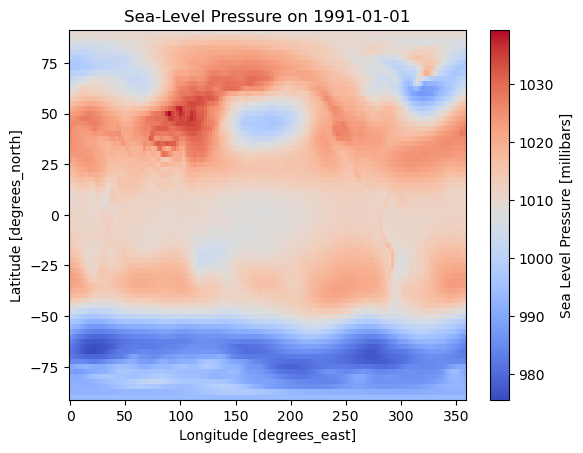

In [3]:
# Plot the first time slice
slp.isel(time=0).plot(cmap="coolwarm")
plt.title(f"Sea-Level Pressure on {str(slp.time.values[0])[:10]}")
plt.show()


## Approach 2: Reading Multiple Files with `open_mfdataset()`

This method is useful when data is split into multiple NetCDF files by year or month. Here, we combine geopotential height data from 2018–2020 using a wildcard pattern.


In [4]:
plev = 500

# === Step 1: Build full path pattern
hgt_path = os.path.join(data_dir, file_hgt_all)

# === Step 2: Open multiple files using wildcard
ds2 = xr.open_mfdataset(hgt_path, combine="by_coords", parallel=True)

# === Step 3: Select 500 hPa level
z500 = ds2["hgt"].sel(level=plev)

# === Step 4: Preview result
z500


<xarray.DataArray 'hgt' (time: 1096, lat: 73, lon: 144)> Size: 46MB
dask.array<getitem, shape=(1096, 73, 144), dtype=float32, chunksize=(1, 73, 144), chunktype=numpy.ndarray>
Coordinates:
    level    float32 4B 500.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 9kB 2018-01-01 2018-01-02 ... 2020-12-31
Attributes:
    long_name:     mean Daily Geopotential height
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [ -700. 35000.]
    dataset:       NCEP Reanalysis Daily Averages
    actual_range:  [ -523.75 32252.75]

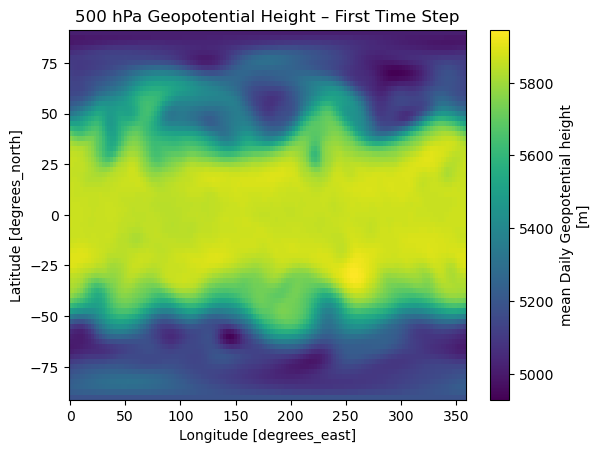

In [5]:
z500.isel(time=0).plot(cmap="viridis")
plt.title("500 hPa Geopotential Height – First Time Step")
plt.show()


## Approach 3: Reading Multiple NCEP Files by Year Range

This method loads daily geopotential height (`hgt`) data from multiple yearly NCEP files using a specified range of years. It uses `xarray.open_mfdataset` to combine the data into a single dataset for easy analysis.


In [6]:
# === PARAMETERS ===
ystr, yend = 2018, 2020
plev = 250

years = list(range(ystr, yend + 1))
file_list = [os.path.join(data_dir, file_hgt_year.replace("YYYY", str(y))) for y in years]

ds3 = xr.open_mfdataset(file_list, combine="by_coords")
z250 = ds3["hgt"].sel(level=plev)
z250


<xarray.DataArray 'hgt' (time: 1096, lat: 73, lon: 144)> Size: 46MB
dask.array<getitem, shape=(1096, 73, 144), dtype=float32, chunksize=(1, 73, 144), chunktype=numpy.ndarray>
Coordinates:
    level    float32 4B 250.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 9kB 2018-01-01 2018-01-02 ... 2020-12-31
Attributes:
    long_name:     mean Daily Geopotential height
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [ -700. 35000.]
    dataset:       NCEP Reanalysis Daily Averages
    actual_range:  [ -523.75 32252.75]

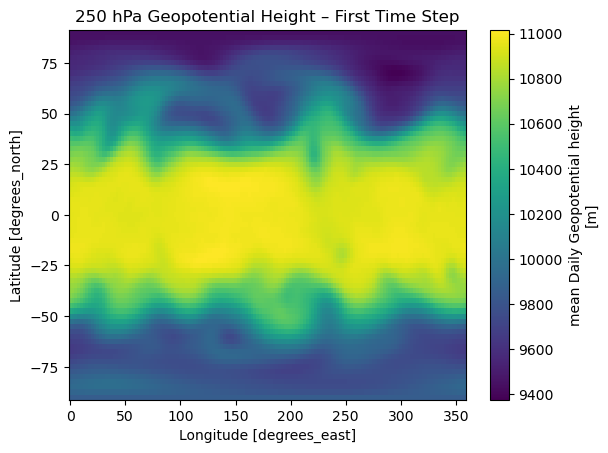

In [7]:
z250.isel(time=0).plot(cmap="viridis")
plt.title("250 hPa Geopotential Height – First Time Step")
plt.show()

## Approach 4: Downsampling High-Resolution SST Data

This method demonstrates how to load a high-resolution sea surface temperature (SST) dataset and reduce its spatial resolution to speed up processing and simplify visualization. This is especially useful for global daily SST data.

We use the NOAA OISST dataset `sst.oisst_high.198109-202504.nc`, which is approximately 0.25° in spatial resolution.


In [13]:
# === PARAMETERS ===
use_lowres = True
coarsen_factor = 4
method = "isel"  # options: "isel" or "coarsen"

# === Paths ===
data_path = os.path.join(data_dir, file_sst)
lowres_file = os.path.join(data_dir, file_sst.replace(".nc", f".low.{method}.nc"))

# === Load SST ===
if use_lowres and os.path.exists(lowres_file):
    print(f"📁 Found existing low-res SST: {lowres_file}")
    ds = xr.open_dataset(lowres_file)
else:
    print(f"⚙️ Creating low-resolution SST from: {data_path}")
    ds_full = xr.open_dataset(data_path)

    if method == "isel":
        ds_lowres = ds_full.isel(
            lat=slice(None, None, coarsen_factor),
            lon=slice(None, None, coarsen_factor)
        )
    elif method == "coarsen":
        ds_lowres = ds_full.coarsen(
            lat=coarsen_factor,
            lon=coarsen_factor,
            boundary='trim'
        ).mean()
    else:
        raise ValueError("`method` must be 'isel' or 'coarsen'.")

    ds_lowres.to_netcdf(lowres_file)
    print(f"✅ Saved low-res file to: {lowres_file}")
    ds = ds_lowres

# === Final variable: sst ===
sst = ds["sst"]
sst


⚙️ Creating low-resolution SST from: ../data/sst.oisst_high.198109-202504.nc
✅ Saved low-res file to: ../data/sst.oisst_high.198109-202504.low.isel.nc


<xarray.DataArray 'sst' (time: 524, lat: 180, lon: 360)> Size: 136MB
[33955200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-04-01
  * lat      (lat) float32 720B -89.88 -88.88 -87.88 ... 87.12 88.12 89.12
  * lon      (lon) float32 1kB 0.125 1.125 2.125 3.125 ... 357.1 358.1 359.1
Attributes:
    long_name:      Monthly Mean of Sea Surface Temperature
    units:          degC
    valid_range:    [-3. 45.]
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Monthly Mean
    parent_stat:    Individual Observations
    actual_range:   [-1.8  32.14]
    standard_name:  sea_surface_temperature

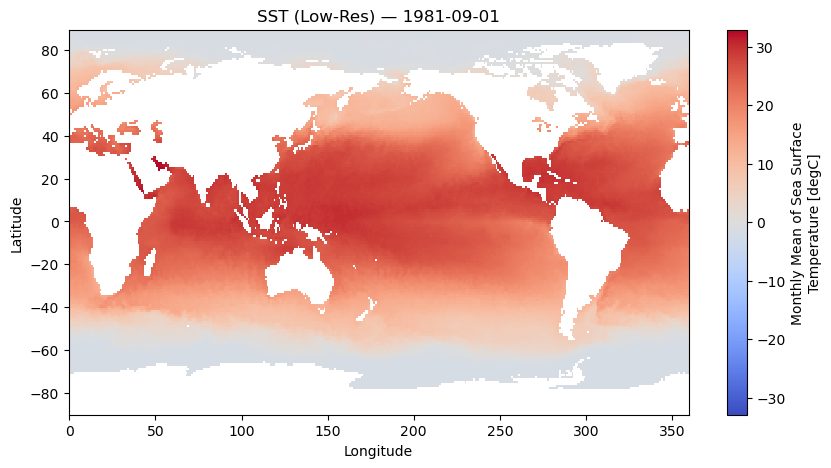

In [14]:
# === Step 6: Plot the first monthly SST map
sst.isel(time=0).plot(
    cmap="coolwarm", 
    figsize=(10, 5)
)
plt.title(f"SST (Low-Res) — {str(sst.time.values[0])[:10]}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()